## Car Price Prediction 


### 1. Data Understanding 


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [10]:
# Let's take a look at the first few rows
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [12]:
# Symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [13]:
# Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
# pressure) or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
# Drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

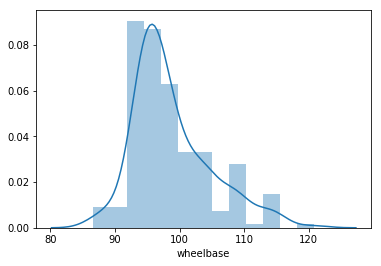

In [15]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

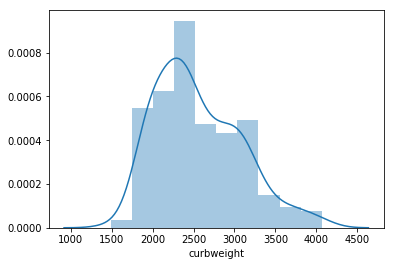

In [16]:
# Curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

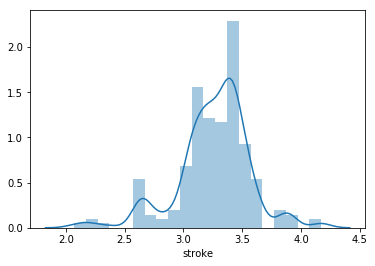

In [17]:
# Stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

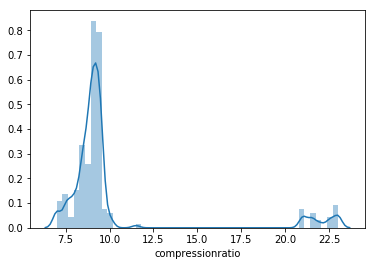

In [18]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

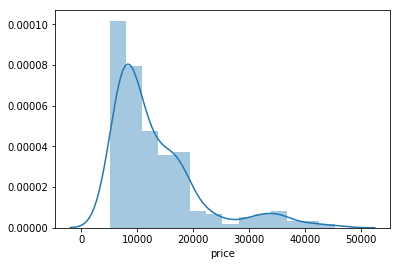

In [19]:
# Target variable: price of car
sns.distplot(cars['price'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [20]:
# All numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, as you might notice, `car_ID` isn't of any use to building a linear regression model. Hence, we drop it.

In [21]:
# Dropping car_ID 
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

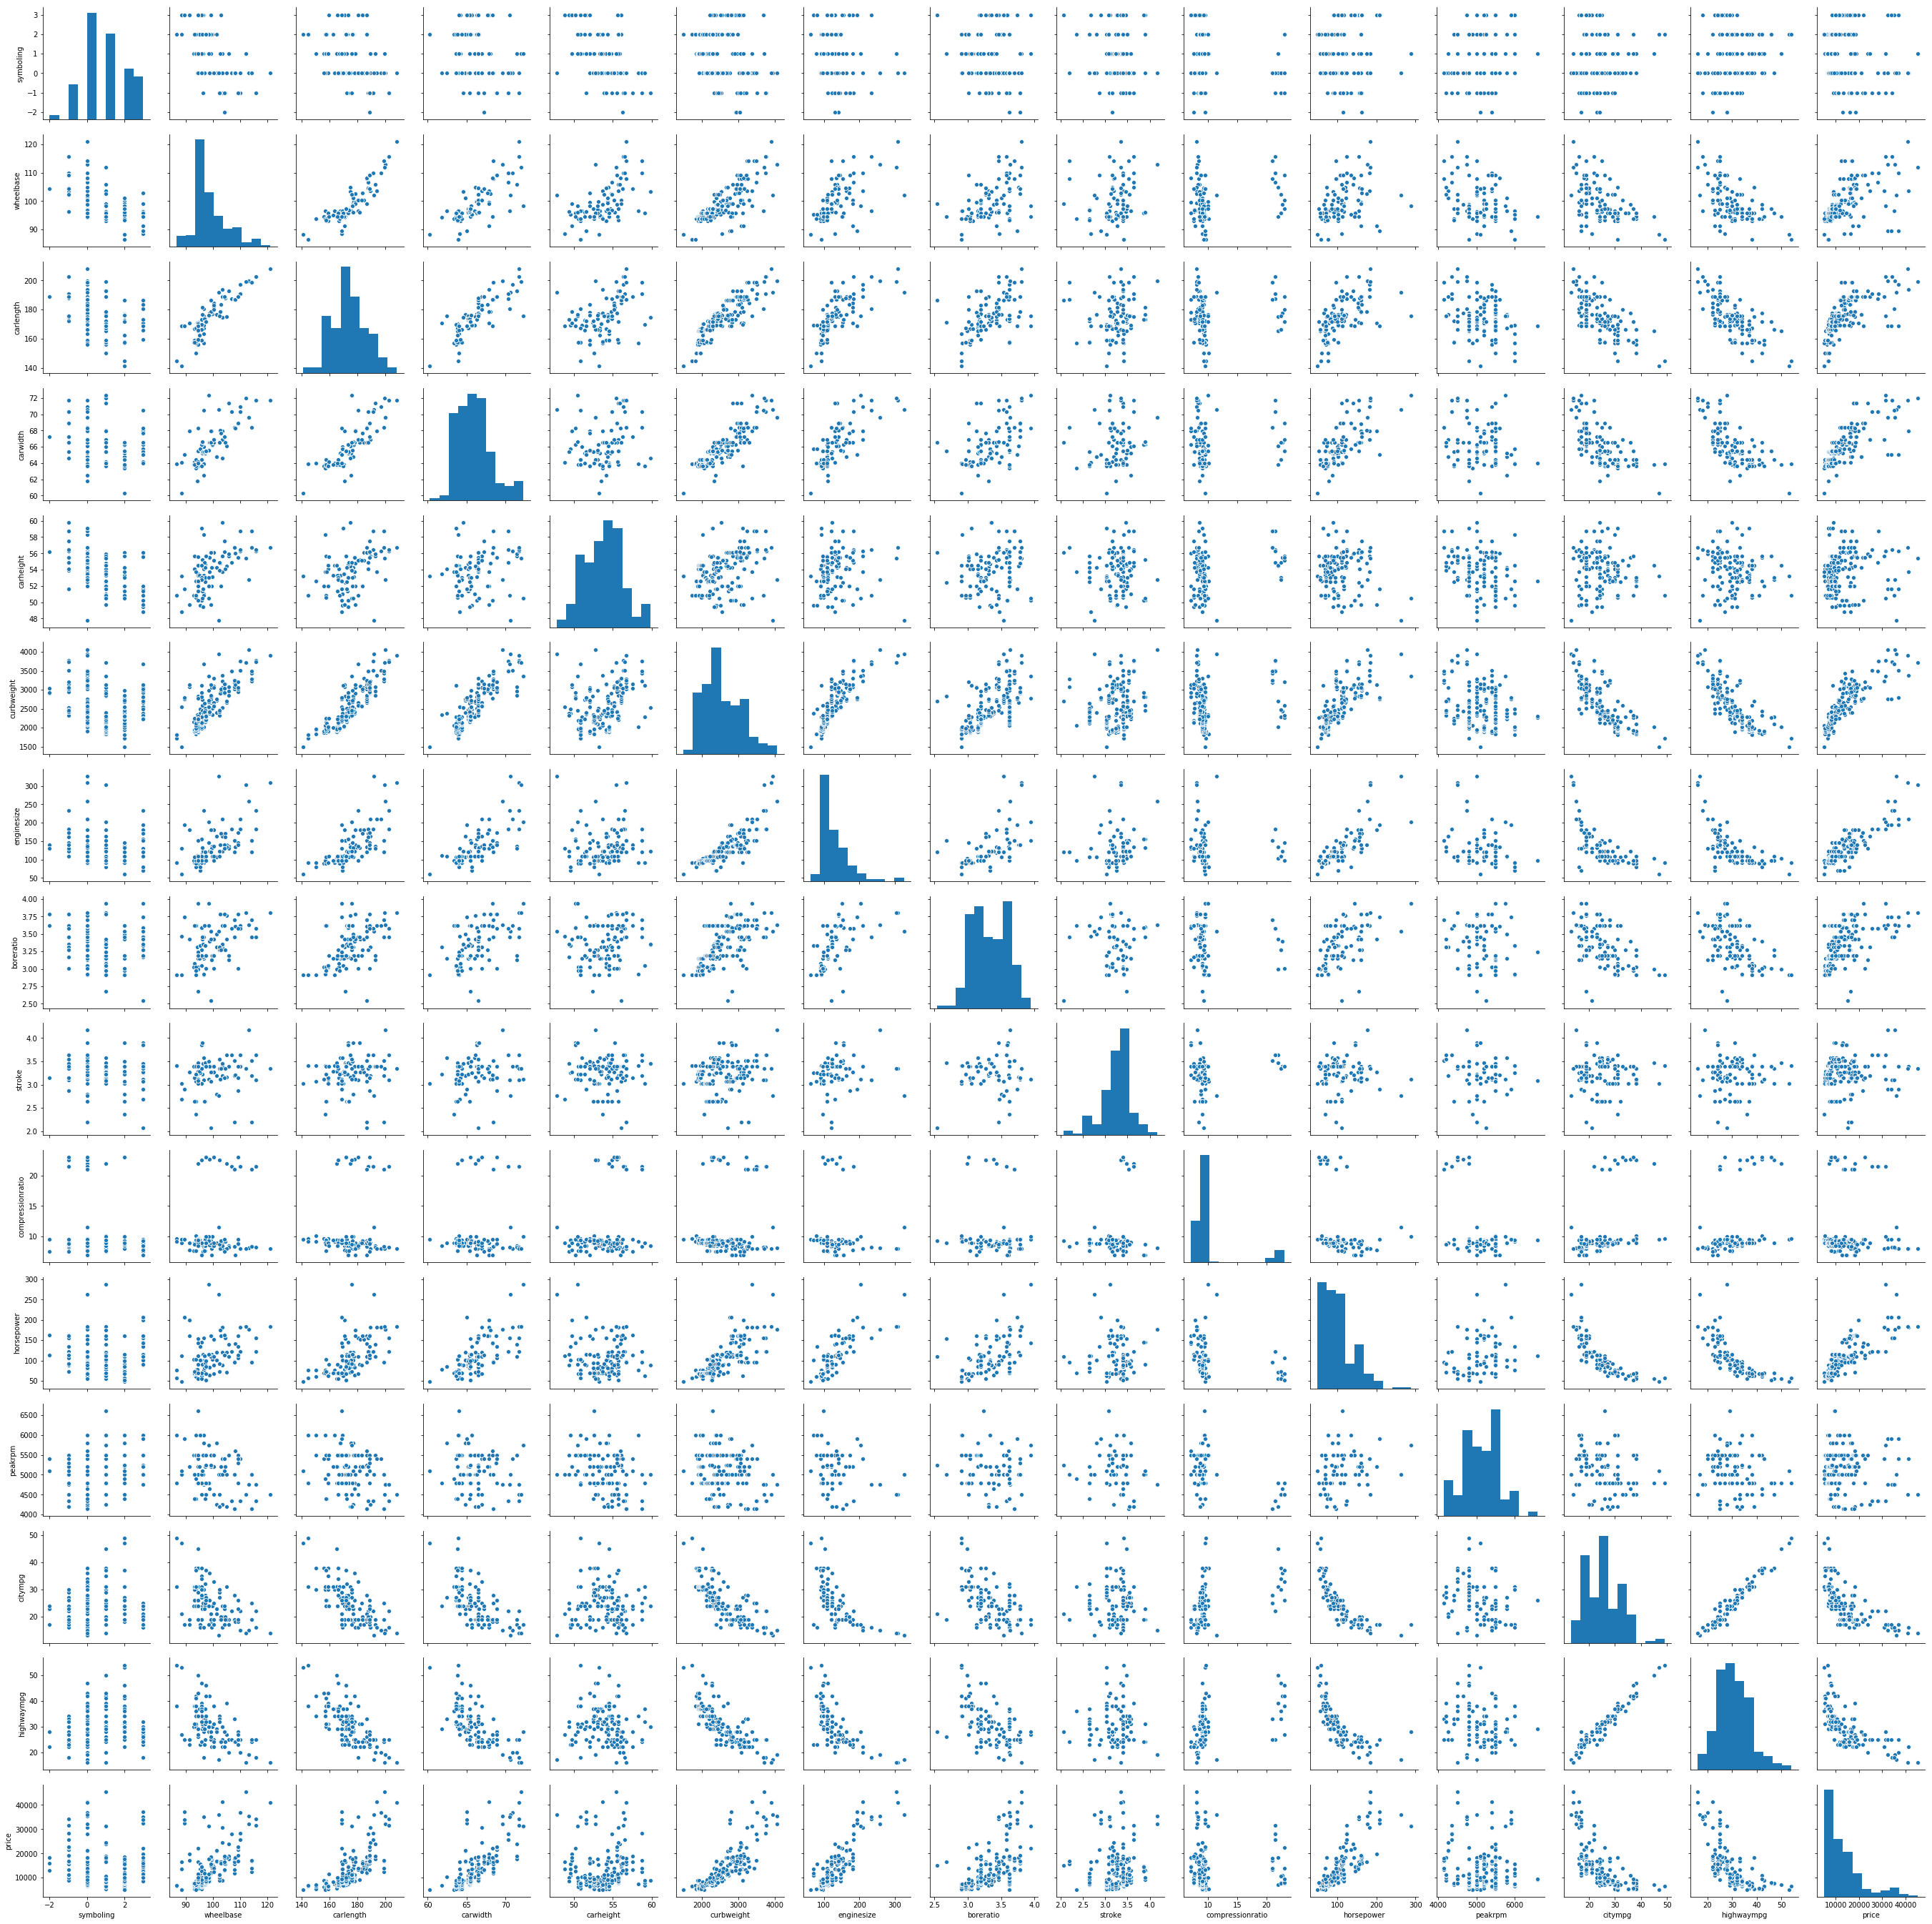

In [22]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [23]:
# Correlation matrix
cor = cars_numeric.corr()
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


Let's plot the correlations on a heatmap for better visualisation

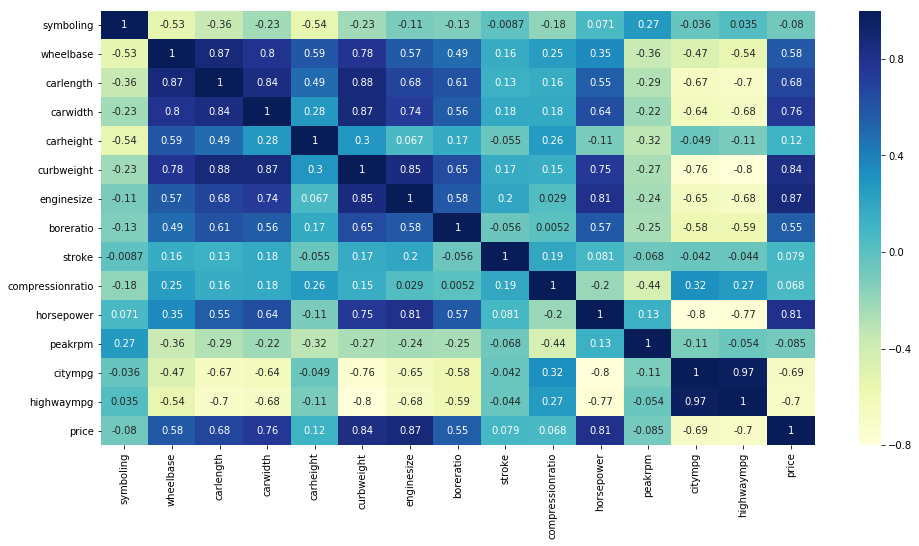

In [24]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity.

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format.

In [19]:
# Variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Next, we need to extract the company name from the column `CarName`. 

In [20]:
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the car name is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. Let's see how we can do that.

In [21]:
# Extracting carname

# Method: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [22]:
# Method 2: Use regular expressions (Note: This hasn't been included in the module and thus, it is not expected that you use
# this method in your assignment. This is just for you to learn a new method)

import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

Let's create a new column to store the company name and check whether it looks okay.

In [23]:
# Create a new column named car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [24]:
# Look at all values since this column will be used as a categorical variable
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

Notice that **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [25]:
# Replacing the misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [26]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [27]:
# Drop carname variable
cars = cars.drop('CarName', axis=1)

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [29]:
# Let's check for any outliers
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

In [30]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Notice that two of the variables - `doornumber` and `cylindernumber` are numeric types with the numbers written as words. Let's map these to actual numbers to avoid too many dummy variable creations ahead.

Note that you can also treat them as categorical variables (these two and also, `symboling`) and create dummy variables for them. It's upto you.

In [31]:
# Checking the different levels of 'cylindernumber'
cars['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [32]:
# Checking the different levels of 'doornumber'
cars['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [33]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(num_map)

Let's now create dummy variables for the categorical variables

In [34]:
# Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [35]:
# Convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Drop categorical variable columns
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [37]:
# Concatenate dummy variables with X
cars = pd.concat([cars, cars_dummies], axis=1)

In [38]:
# Let's check the first few rows
cars.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


Notice that the `car_ID` column is still there. We had dropped it from the 'cars_numeric' dataframe but not from the original. Let's drop it now.

In [39]:
# Drop the 'car_ID' column
cars.drop('car_ID', axis = 1, inplace = True)

## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [40]:
# Split the datafram into train and test sets
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [41]:
cars_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Let's scale all these columns using StandardScaler. You can use any other scaling method as well; it is totally up to you. Also, note that you had converted two other variables, viz., 'doornumber' and 'cylindernumber' to numeric types. So you would need to include them in the varlist as well

In [42]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [43]:
# Let's take a look at the train dataframe now
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


As expected, the variables have been appropriately scaled.

In [44]:
# Split the train dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

### Building the first model with all the features

Let's now build our first model with all the features.

In [45]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-8.85082799e-03  2.05396206e-02  2.15459688e-01 -1.20891864e-01
  2.14312437e-01 -1.69734529e-01  2.71975134e-01 -2.88819050e-01
  9.98176607e-01 -3.16364315e-01 -1.09027004e-01 -4.45741225e-01
 -1.28216803e-01  1.89046429e-01  6.10383234e-02  7.95225308e-02
 -7.13939879e-01  3.92563218e-01 -5.68397039e-01 -6.33741325e-01
 -5.33209547e-01 -4.44213621e-01 -6.30834556e-02  4.57246372e-02
  9.85062979e-01  9.02650092e-01  9.94703704e-01  2.82949424e-01
  6.10461201e-01  8.12155616e-03  1.12048455e+00  1.19956250e-01
 -3.05423110e-01  7.13939879e-01 -4.44089210e-16 -4.00301122e-02
 -5.85575952e-02 -8.88178420e-16 -1.28333697e-01  1.01695043e+00
  1.12409662e-01 -5.91117054e-01 -7.18611643e-01 -5.01548738e-01
 -3.06608953e-01 -2.48183458e-01 -1.57753086e-01  2.22044605e-16
 -8.09182737e-01 -2.48597762e-01 -1.33327298e+00 -7.13453493e-01
  7.94779273e-01 -3.31355674e-01  7.05291444e-01 -3.74601778e-01
 -1.77619987e-01 -1.76633338e-01  1.86531496e-02]
0.9701688083156929


#### Model Building Using RFE

Now, you have close to 60 features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [48]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False False  True False False False  True False False  True
 False False False False  True False False False False False False False
  True False  True False  True False  True False False  True False False
 False False False  True False False False False False False  True False
  True False  True False False  True False  True False False False]
[41 39 28 31  1 26 17 32  1 18 33  1 23 24 37 30  1 16 14 12 13 15 35 38
  1 22  1 20  1 42  1 36 10  1 44 27 19 43  9  1 34  8  6  4 25 29  1 45
  1  2  1  7 11  1 21  1  3  5 40]


#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [49]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,carwidth,enginesize,compressionratio,fueltype_gas,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,fuelsystem_idi,car_company_bmw,car_company_mazda,car_company_mitsubishi,car_company_peugeot,car_company_renault,car_company_subaru
122,1.0,-0.924500,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
125,1.0,1.114978,0.637806,-0.146125,1,0,0,0,0,0,0,0,0,0,0,0
166,1.0,-0.833856,-0.660242,-0.172569,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.788535,0.123485,-0.278345,1,0,0,0,0,0,0,0,0,0,0,0
199,1.0,0.616439,0.123485,-0.675002,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           4.59e-64
Time:                        16:31:11   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fueltype_gas,inf
5,enginelocation_rear,inf
7,enginetype_ohcf,inf
9,fuelsystem_idi,inf
15,car_company_subaru,inf
3,compressionratio,42.320000
13,car_company_peugeot,9.730000
6,enginetype_l,8.990000
1,carwidth,3.380000
2,enginesize,3.300000


Notice that there are a few variables which have an infinite VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. Let's try and build a model with 10 features this time using RFE and see what we get.

In [54]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe2 = RFE(lm, 10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [55]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.98e-64
Time:                        16:31:48   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

Note that the adjusted R-squared value hasn't dropped much practically. It has gone from `0.912` to `0.901`. So 10 variables seems to be a good number to start with.

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginelocation_rear,inf
5,enginetype_ohcf,inf
10,car_company_subaru,inf
8,car_company_peugeot,9.490000
4,enginetype_l,8.950000
2,enginesize,3.230000
1,carwidth,3.170000
0,const,1.310000
6,enginetype_rotor,1.150000
7,car_company_bmw,1.090000


There are still some variables that need to be dropped. Let's start by dropping `car_company_subaru`.

In [58]:
X_train_rfe2.drop('car_company_subaru', axis = 1, inplace = True)

In [59]:
# Refitting with 9 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.98e-64
Time:                        16:32:45   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,car_company_peugeot,9.49
4,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
3,enginelocation_rear,1.19
6,enginetype_rotor,1.15
5,enginetype_ohcf,1.12
7,car_company_bmw,1.09
9,car_company_renault,1.01


The infinite VIFs have now dropped to a workable value. But from the p-value perspective, `enginetype_ohfc` has become insignificant. So let's drop that.

In [61]:
X_train_rfe2.drop('enginetype_ohcf', axis = 1, inplace = True)

In [62]:
# Refitting with 8 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           8.22e-65
Time:                        16:32:50   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,car_company_peugeot,9.49
4,enginetype_l,8.94
2,enginesize,3.20
1,carwidth,3.17
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
6,car_company_bmw,1.09
8,car_company_renault,1.01


The variables seem significant, but we still have few high VIFs. Let's drop them and see if the Adjusted R-squared score is getting affected.

In [64]:
X_train_rfe2.drop('car_company_peugeot', axis = 1, inplace = True)

In [65]:
# Refitting with 7 variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           2.49e-63
Time:                        16:32:52   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,3.14
1,carwidth,2.91
0,const,1.19
5,enginetype_rotor,1.14
3,enginelocation_rear,1.09
4,enginetype_l,1.09
6,car_company_bmw,1.09
7,car_company_renault,1.00


The `enginetype_l` variables now has a p-value of `0.3`. Let's drop it and see if it affects the model much.

In [67]:
# Refitting with 6 variables
X_train_rfe2.drop('enginetype_l', axis = 1, inplace = True)

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 6 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           2.92e-64
Time:                        16:32:53   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,3.01
1,carwidth,2.68
4,enginetype_rotor,1.12
0,const,1.10
5,car_company_bmw,1.09
3,enginelocation_rear,1.08
6,car_company_renault,1.00


All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.91` with **15 variables** to just `0.89` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [69]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5,0,'Errors')

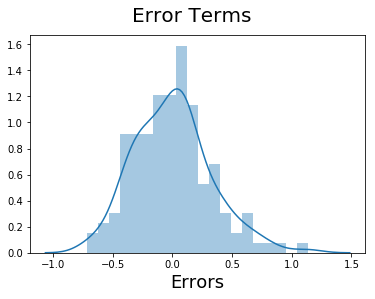

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [71]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [72]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [73]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
col2

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

In [74]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [75]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'], axis = 1)

In [76]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 7 columns):
const                  62 non-null float64
carwidth               62 non-null float64
enginesize             62 non-null float64
enginelocation_rear    62 non-null uint8
enginetype_rotor       62 non-null uint8
car_company_bmw        62 non-null uint8
car_company_renault    62 non-null uint8
dtypes: float64(3), uint8(4)
memory usage: 2.2 KB


In [77]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0,0.5,'y_pred')

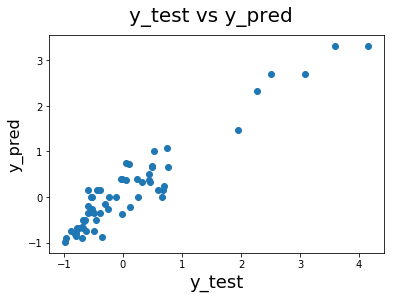

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [79]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8997211435182687

Thus, for the model with 6 variables, the r-squared on training and test data is about 89.6% and 89.9% respectively. The adjusted r-squared on the train set is about is about 89.1%.

#### Checking the correlations between the final predictor variables

In [80]:
col2 = col2.drop(['enginetype_ohcf', 'car_company_peugeot', 'enginetype_l', 'car_company_subaru'])

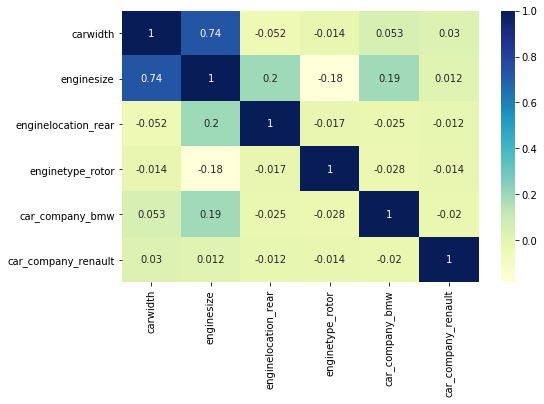

In [81]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(cars[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

Though this is the most simple model we've built till now, few final predictors still seem to have high correlations. One can go ahead and remove some of these features, though that will affect the adjusted-r2 score significantly (you should try doing that). 


Thus, for now, the final model consists of the 6 variables mentioned above.